# Projet Machine Learning Datamining

## Decrire les objectifs et les données . preciser la source 

### Importation des données 

###  Source :  https://www.kaggle.com/c/digit-recognizer/data?select=sample_submission.csv 


Description des données : Chaque image mesure 28 pixels de hauteur et 28 pixels de largeur,
soit un total de 784 pixels. Chaque pixel est associé à une valeur unique, qui indique la 
clarté ou l'obscurité de ce pixel, les chiffres les plus élevés signifiant les plus sombres. 
Cette valeur de pixel est un nombre entier compris entre 0 et 255, inclus.

L'ensemble de données d'apprentissage (train.csv) comporte 785 colonnes. La première 
colonne, appelée "label", est le chiffre qui a été dessiné par l'utilisateur. 
Les autres colonnes contiennent les valeurs des pixels de l'image associée.
Chaque colonne de pixels de l'ensemble d'apprentissage porte un nom tel que 
pixelx, où x est un nombre entier compris entre 0 et 783, inclus. Pour localiser 
ce pixel sur l'image, supposons que nous ayons décomposé x comme suit : x = i * 28 + j, 
où i et j sont des entiers compris entre 0 et 27 inclus. Le pixelx est alors situé sur 
la ligne i et la colonne j d'une matrice 28 x 28, (indexation par zéro).
Par exemple, pixel31 indique le pixel qui se trouve dans la quatrième colonne 
en partant de la gauche, et la deuxième ligne en partant du haut, comme dans le 
diagramme ascii ci-dessous.

* Les données train set et les données test set 

* La base de données train contient des images sous forme de colonnes avec des pixels.

* Dans cette base de données il y a 784 variables pixels et une variable cible (label) et 42 000 lignes

* Dans la base de données test il y a 784 variables pixels et 28 000 lignes 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
data = pd.read_csv("data_fichier.csv")
data = data.drop(data.columns[[0]], axis=1)
data

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [3]:
print("la dimension de data est :", data.shape)

la dimension de data est : (70000, 785)


## Explorons, visualisons les données, calculons des statistiques de base (pandas )

* Importation des données avec le module pandas 

* exploration des données en faisant la description des données et regarder les 
informations contenues sur ces données 




In [4]:
print("contenu des doonées data \n", data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 785 entries, pixel0 to label
dtypes: int64(785)
memory usage: 419.2 MB
contenu des doonées data 
 None


In [5]:
print("type de données\n", data.dtypes)

type de données
 pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
pixel4      int64
            ...  
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
label       int64
Length: 785, dtype: object


### Calculs statistiques 

* Calcul des statistiques de base c'est à dire la moyenne, l'ecart type etc ...

In [6]:
# calcul statistiques 
print("statistiques de base de data est : \n", data.describe() )

statistiques de base de data est : 
         pixel0   pixel1   pixel2   pixel3   pixel4   pixel5   pixel6   pixel7  \
count  70000.0  70000.0  70000.0  70000.0  70000.0  70000.0  70000.0  70000.0   
mean       0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
std        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
25%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
50%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
75%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
max        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

        pixel8   pixel9  ...      pixel775      pixel776      pixel777  \
count  70000.0  70000.0  ...  70000.000000  70000.000000  70000.000000   
mean       0.0      0.0  ...      0.099543      0.046629      0.016614   
std        

### Visualisation des images 

* Visualisation des données : les graphiques des differentes variables de la base de données 

In [8]:
images = np.array(data.drop(['label'], axis=1)) / 255
label = np.array(data['label']) / 255

In [9]:
labels = np.array(label[:12]) / 255

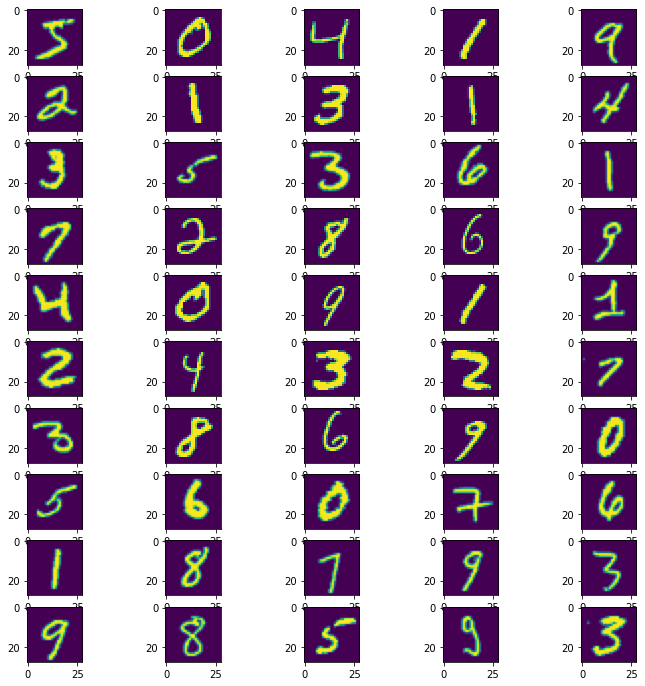

In [10]:
# visualisation 
images12 = np.array(images[:50, :]) / 255
plt.figure(figsize=(12, 12))
for i in range(50):
    plt.subplot(10, 5, i+1)
    plt.imshow(images12[i].reshape(28,28))
plt.show()

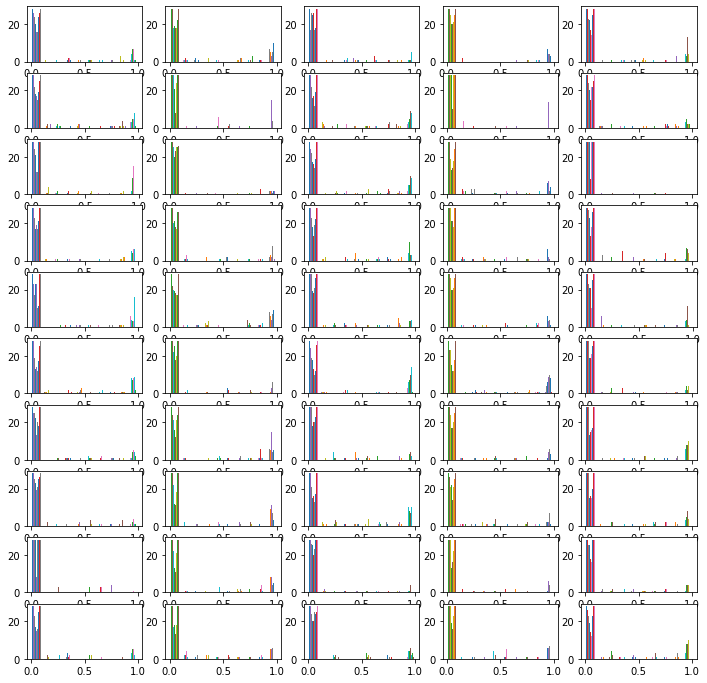

In [15]:
# visualisation 
images12 = np.array(images[:50, :])
plt.figure(figsize=(12, 12))
for i in range(50):
    plt.subplot(10, 5, i+1)
    plt.hist(images12[i].reshape(28,28))
plt.show()

<AxesSubplot:>

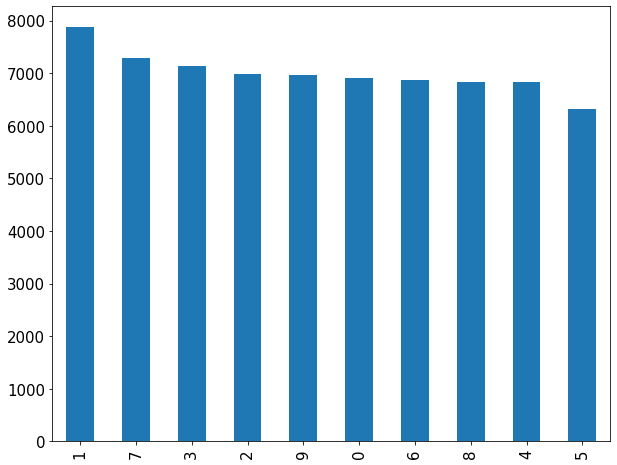

In [12]:
count = pd.value_counts(data['label'].values)
count.plot.bar(figsize=(10,8), fontsize=15)

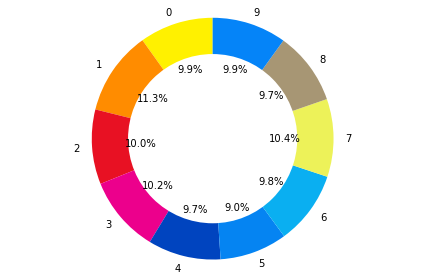

In [14]:
label = np.array(data['label']) 
values = np.unique(label,return_counts=True)[1]

sizes = values

# Choix des couleurs

colors =['#fff100','#ff8c00','#e81123','#ec008c','#0044bf','#0584f2','#0aaff1','#edf259','#a79674', '#0584f8']
 
# Construction du diagramme et affichage des labels et des #fréquences en pourcentage

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=np.unique(label), autopct='%1.1f%%', startangle=90)

# Tracé du cercle au milieu

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Affichage du diagramme

ax1.axis('equal')  
plt.tight_layout()
plt.show()

## scinder le jeu de données en deux ensembles:

- ensemble d'apprentissage 

- ensemble de test (validation)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [30]:
y = np.array(data['label'])
X = np.array(data.drop(['label'], axis=1)) / 255
print("la dimension de X est : ", X.shape)
print("la dimension de y est : ", y.shape)

la dimension de X est :  (70000, 784)
la dimension de y est :  (70000,)


In [31]:
X_train,  X_test,y_train, y_test = train_test_split(X,
                                                   y, 
                                                    test_size=0.15,
                                                   random_state=29)

In [32]:
print("la dimension de X_train est : ", X_train.shape)
print("la dimension de y_train est : ", y_train.shape)
print("la dimension de X_test est : ", X_test.shape)
print("la dimension de y_test est : ", y_test.shape)

la dimension de X_train est :  (59500, 784)
la dimension de y_train est :  (59500,)
la dimension de X_test est :  (10500, 784)
la dimension de y_test est :  (10500,)


### Les modèles simples de machine learning 

* le modèle K Nearest Neighbors (KNN)

L’algorithme des K plus proches voisins ou K-nearest neighbors (kNN)
est un algorithme de Machine Learning qui appartient à la classe des 
algorithmes d’apprentissage supervisé simple et facile à mettre en œuvre 
qui peut être utilisé pour résoudre les problèmes de classification


In [33]:
from sklearn.model_selection import ShuffleSplit

In [34]:
kn = KNeighborsClassifier( metric='euclidean', weights='distance')

In [35]:
kn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', weights='distance')

In [37]:
import time
t0 = time.time()

In [38]:
sss = ShuffleSplit(n_splits=10, random_state=29) 

kn_scores = cross_val_score(kn,
                            X_train, 
                            y_train,
                            cv = sss,
                           scoring='accuracy')

In [40]:
t1 = time.time()
print("--- temps d'execution ---", (t1 - t0)/60) 

--- temps d'execution --- 3.816591668128967


In [41]:
kn_scores.mean()

0.971983193277311

In [42]:
y_pred = kn.predict(X_test)

In [43]:
accuracy_score(y_test, y_pred)

0.9751428571428571

### On trace les courbes d’évolution des performances en fonction de la valeur de k 

In [44]:
from sklearn.metrics import confusion_matrix

In [45]:
matrix = confusion_matrix(y_test, y_pred)

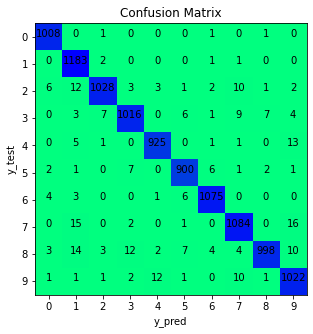

In [46]:
plt.figure(figsize=(5, 5))
plt.imshow(matrix, cmap='winter_r')
for i in range(10):
    for j in range(10):
        plt.text(x=i, y=j, s=matrix[j, i], horizontalalignment='center')
plt.title("Confusion Matrix")
plt.xticks(range(10))
plt.yticks(range(10))
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.grid(0)
plt.show()

In [47]:
from sklearn.svm import SVC 

In [48]:
clf = SVC()

In [49]:
clf.fit(X_train, y_train)

SVC()

In [50]:
import time
t0 = time.time()

In [51]:
sss = ShuffleSplit(n_splits=10, random_state=29) 

clf_scores = cross_val_score(clf,
                            X_train, 
                            y_train,
                            cv = sss,
                           scoring='accuracy')

In [53]:
t1 = time.time()
print("--- temps d'execution ---" , (t1 - t0)/60)

--- temps d'execution --- 56.495790497461954


In [54]:
clf_scores.mean()

0.9783529411764708

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

### GridSeachCV pour choisir les meilleurs parametres 

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = {'n_neighbors':  np.arange(1, 10), 
              'metric' : ['euclidean', 'manhattan']}

In [ ]:
grid = GridSearchCV(KNeighborsClassifier(), parameters)

In [ ]:
grid.fit(X_train, y_train)

### Les modèles ensemblistes de machine learning 

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

In [2]:
ada_boost_clf = AdaBoostClassifier(DecisionTreeClassifier())
ada_boost_clf.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [ ]:
sss = ShuffleSplit(n_splits=10, random_state=0) 

ada_boost_clf_scores = cross_val_score(ada_boost_clf,
                            X_train, 
                            y_train,
                            cv = sss,
                           scoring='accuracy')

In [3]:
ada_boost_clf_scores.mean()

NameError: name 'ada_boost_clf_scores' is not defined

In [ ]:
y_pred = ada_boost_clf.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
ada_boost_clf = AdaBoostClassifier(DecisionTreeClassifier())
ada_boost_clf.fit(X_train, y_train)

In [ ]:
sss = ShuffleSplit(n_splits=10, random_state=0) 

ada_boost_clf_scores = cross_val_score(ada_boost_clf,
                            X_train, 
                            y_train,
                            cv = sss,
                           scoring='accuracy')

In [ ]:
ada_boost_clf_scores.mean()

In [ ]:
y_pred = ada_boost_clf.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
bg = BaggingClassifier(SVC())
bg.fit(X_train,y_train)

In [ ]:
# define the evaluation method
cv = ShuffleSplit(n_splits=10, random_state=0)
# evaluate the model on the dataset
bg_scores = cross_val_score(bg, 
                            X_train, 
                            y_train, 
                            scoring='accuracy', cv=cv)

In [ ]:
bg_scores.mean()

In [ ]:
y_pred = bg.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
grad_boost_clf = GradientBoostingClassifier(SVC(), random_state=0)
grad_boost_clf.fit(X_train, y_train)

In [ ]:
# define the evaluation method
cv = ShuffleSplit(n_splits=10, random_state=0)
# evaluate the model on the dataset
grad_boost_clf_scores = cross_val_score(grad_boost_clf, 
                            X_train, 
                            y_train, 
                            scoring='accuracy', cv=cv)

In [ ]:
grad_boost_clf_scores.mean()

In [ ]:
y_pred = grad_boost_clf.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)